# GD for different SNR's

In [15]:
# Imports
import torch
from models.singleheadattention import SingleHeadAttention

# Functions to generate, train and plot the results
from utils.generate_data import generate_data
from utils.train_model import train_with_gradient_descent, plot_metrics

In [16]:
# Parameters
d_list = [10,100, 250, 1000]
n_train = 500
n_test = 10000
beta = 0.02
rho = 30
eta = 0.1
margin_lambda = 1.0

In [17]:
# Use GPU
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
        device = torch.device("cpu")
print("Using device:", device)

Using device: mps


d =  10
Epoch 1
Epoch 50
Epoch 100
Epoch 150
Epoch 200
Epoch 250
Epoch 300


d =  100
Epoch 1
Epoch 50
Epoch 100
Epoch 150
Epoch 200
Epoch 250
Epoch 300


d =  250
Epoch 1
Epoch 50
Epoch 100
Epoch 150
Epoch 200
Epoch 250
Epoch 300


d =  1000
Epoch 1
Epoch 50
Epoch 100
Epoch 150
Epoch 200
Epoch 250
Epoch 300




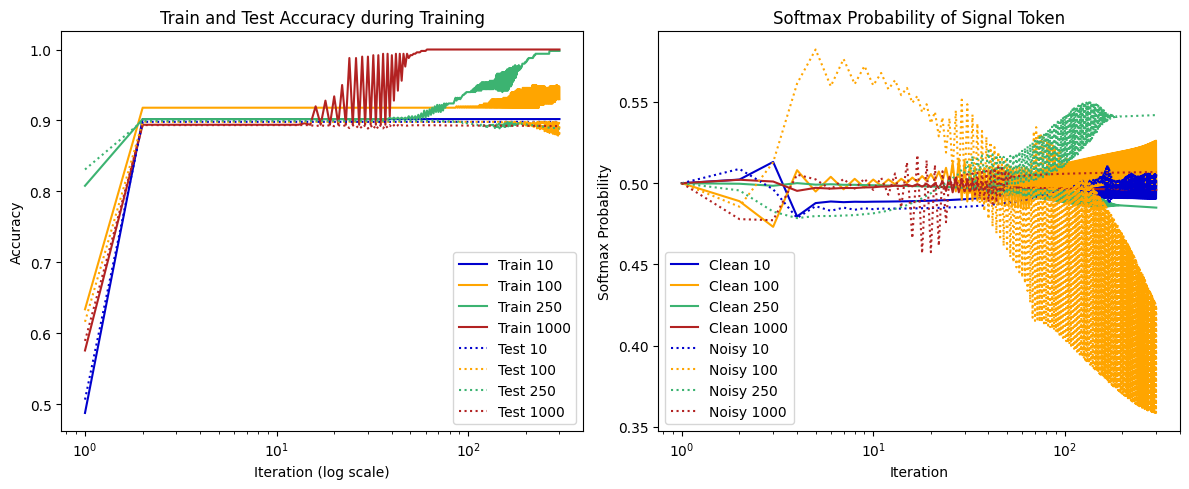

In [ ]:
# Generate data
train_accs, test_accs, clean_probas, noisy_probas = [], [], [], []

for d in d_list:
    print('d = ', d)
    # Training and test data
    X_train_np, y_train_np, clean_indices_train, noisy_indices_train = generate_data(n_train, d, rho, eta= 0.1, seed = 1 + d)
    X_test_np,  y_test_np, clean_indices_test, noisy_indices_test = generate_data(n_test, d, rho, eta= 0.1, seed = 2 + d)


    X_train = torch.tensor(X_train_np, dtype=torch.float32, device=device)
    y_train = torch.tensor(y_train_np, dtype=torch.float32, device=device)
    X_test = torch.tensor(X_test_np, dtype=torch.float32, device=device)
    y_test = torch.tensor(y_test_np, dtype=torch.float32, device=device)


    # Model and optimizer
    model = SingleHeadAttention(d).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=beta)

    # Train model
    train_acc, test_acc, clean_proba, noisy_proba = train_with_gradient_descent(
                                                        model, 
                                                        optimizer, 
                                                        X_train, 
                                                        y_train, 
                                                        X_test, 
                                                        y_test, 
                                                        clean_indices_train, 
                                                        noisy_indices_train,
                                                        beta=beta, num_steps=300)

    train_accs.append(train_acc)
    test_accs.append(test_acc)
    clean_probas.append(clean_proba)
    noisy_probas.append(noisy_proba)

    print('\n')

labels_train_test = [[f'Train {d}' for d in d_list], [f'Test {d}' for d in d_list]]
labels_noise = [[f'Clean {d}' for d in d_list], [f'Noisy {d}' for d in d_list]]

# Plot
plot_metrics(train_accs, test_accs, clean_probas, noisy_probas, labels_train_test, labels_noise)
    
